## Transfer Learning Inception V3 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 [==============================] - 17s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                             

 batch_normalization_99 (BatchN  (None, 25, 25, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 25, 25, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 25, 25, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 25, 25, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 25, 25, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 12, 12, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 12, 12, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 12, 12, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 12, 12, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 12, 12, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 12, 12, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 5, 5, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 5, 5, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 5, 5, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [16]:
len(training_set)

61

In [17]:
len(test_set)

4

In [18]:
# fit the model
# Run the cell. It will take some time to execute
check = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
61/61 [==============================] - 211s 3s/step - loss: 2.2467 - accuracy: 0.7422 - val_loss: 0.6288 - val_accuracy: 0.8302
Epoch 2/15
61/61 [==============================] - 190s 3s/step - loss: 0.4975 - accuracy: 0.9031 - val_loss: 0.9987 - val_accuracy: 0.8491
Epoch 3/15
61/61 [==============================] - 191s 3s/step - loss: 0.8715 - accuracy: 0.8826 - val_loss: 0.8622 - val_accuracy: 0.8679
Epoch 4/15
61/61 [==============================] - 192s 3s/step - loss: 0.5642 - accuracy: 0.9103 - val_loss: 0.2516 - val_accuracy: 0.9434
Epoch 5/15
61/61 [==============================] - 207s 3s/step - loss: 0.6657 - accuracy: 0.9129 - val_loss: 1.0385 - val_accuracy: 0.8585
Epoch 6/15
61/61 [==============================] - 244s 4s/step - loss: 0.5343 - accuracy: 0.9298 - val_loss: 0.6338 - val_accuracy: 0.9340
Epoch 7/15
61/61 [==============================] - 221s 4s/step - loss: 0.4181 - accuracy: 0.9329 - val_loss: 0.7669 - val_accuracy: 0.8962
Epoch 8/15
61

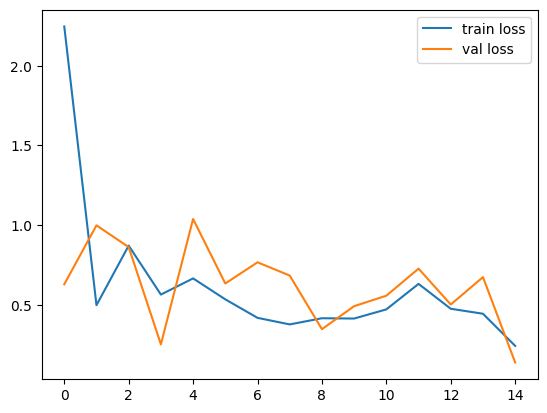

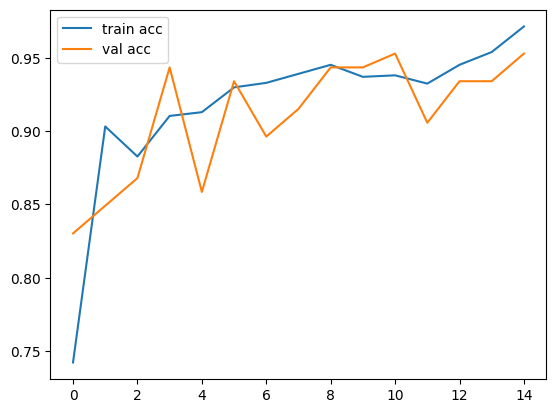

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(check.history['loss'], label='train loss')
plt.plot(check.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(check.history['accuracy'], label='train acc')
plt.plot(check.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inceptionv3.h5')

In [24]:

y_pred = model.predict(test_set)


4/4 [==============================] - 14s 3s/step


In [25]:
y_pred

array([[8.34031787e-30, 7.59744851e-31, 1.00000000e+00, 4.61855783e-23],
       [7.90488720e-24, 1.00000000e+00, 5.76916920e-17, 3.91477441e-11],
       [6.74922769e-29, 1.00000000e+00, 3.86859246e-21, 1.71583648e-32],
       [1.52112724e-17, 5.58905644e-14, 2.93855584e-09, 1.00000000e+00],
       [9.55986076e-28, 8.99024677e-15, 7.52627960e-10, 1.00000000e+00],
       [1.02181862e-14, 5.10621558e-38, 1.00000000e+00, 1.38638606e-26],
       [7.50401601e-22, 9.02407177e-34, 1.00000000e+00, 1.30423023e-16],
       [1.00000000e+00, 0.00000000e+00, 1.01627797e-24, 1.40073660e-37],
       [7.02910054e-21, 0.00000000e+00, 1.00000000e+00, 6.61610447e-16],
       [2.66715517e-07, 4.63700313e-31, 9.99999762e-01, 8.00782487e-19],
       [7.75997952e-32, 1.00000000e+00, 1.43204494e-24, 3.84650496e-21],
       [3.60377487e-20, 1.17229647e-03, 3.25373027e-11, 9.98827755e-01],
       [2.07585770e-19, 5.02815856e-05, 1.27466364e-12, 9.99949694e-01],
       [3.80163083e-15, 1.00000000e+00, 2.55167052e

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([2, 1, 1, 3, 3, 2, 2, 0, 2, 2, 1, 3, 3, 1, 3, 2, 3, 3, 1, 1, 0, 0,
       1, 3, 0, 1, 1, 3, 0, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 2, 0, 3, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 3, 2, 0, 0, 0, 2, 2, 1, 1,
       3, 0, 3, 2, 2, 0, 0, 2, 3, 2, 0, 2, 3, 3, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 2, 3, 1, 3, 3, 1, 0, 0, 2, 0, 3, 0, 2, 1, 2, 1], dtype=int64)

In [31]:
y_pred.shape

(106,)

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [6]:
model=load_model('model_inceptionv3.h5')

In [10]:
import cv2

In [87]:

test_img=cv2.imread('uploads/dis_leaf (16)_iaip.jpg')
test_img

array([[[ 88, 109, 124],
        [ 89, 110, 125],
        [ 87, 108, 123],
        ...,
        [110, 200, 140],
        [112, 202, 143],
        [115, 202, 144]],

       [[ 90, 111, 126],
        [ 90, 111, 126],
        [ 89, 110, 125],
        ...,
        [110, 200, 140],
        [112, 202, 142],
        [114, 201, 143]],

       [[ 91, 112, 127],
        [ 92, 113, 128],
        [ 90, 111, 126],
        ...,
        [110, 200, 140],
        [111, 201, 141],
        [114, 202, 142]],

       ...,

       [[ 77, 109,  92],
        [ 77, 109,  92],
        [ 77, 109,  92],
        ...,
        [114, 152, 134],
        [114, 155, 134],
        [116, 157, 136]],

       [[ 77, 109,  92],
        [ 77, 109,  92],
        [ 77, 109,  92],
        ...,
        [115, 151, 135],
        [117, 155, 137],
        [120, 158, 140]],

       [[ 77, 109,  92],
        [ 77, 109,  92],
        [ 77, 109,  92],
        ...,
        [115, 151, 135],
        [118, 156, 138],
        [121, 159, 141]]

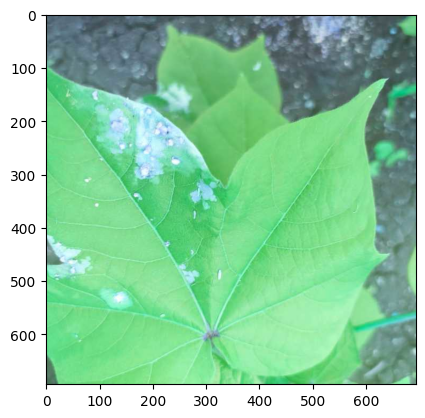

In [88]:
plt.imshow(test_img)

In [89]:
test_img.shape

(694, 694, 3)

In [90]:
test_img=cv2.resize(test_img,(224,224))

In [91]:
test_img=test_img/255

In [92]:
test_input=test_img.reshape((1,224,224,3))

In [93]:
model.predict(test_input)

1/1 [==============================] - 0s 189ms/step


array([[1.0000000e+00, 3.6984898e-33, 1.0901470e-09, 2.3233898e-26]],
      dtype=float32)

In [94]:
result = model.predict(test_input)
result 

1/1 [==============================] - 0s 329ms/step


array([[1.0000000e+00, 3.6984898e-33, 1.0901470e-09, 2.3233898e-26]],
      dtype=float32)

In [95]:
result = result.flatten()
result

array([1.0000000e+00, 3.6984898e-33, 1.0901470e-09, 2.3233898e-26],
      dtype=float32)

In [96]:
a=np.argmax(result)

In [97]:
a

0

(224, 224, 3)

In [15]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [16]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [17]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])

In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.2.0'